In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [2]:
df = pd.read_pickle('ICOS - model.pickle')
df_noz = pd.read_pickle('ICOS - modelwout zeros.pickle')

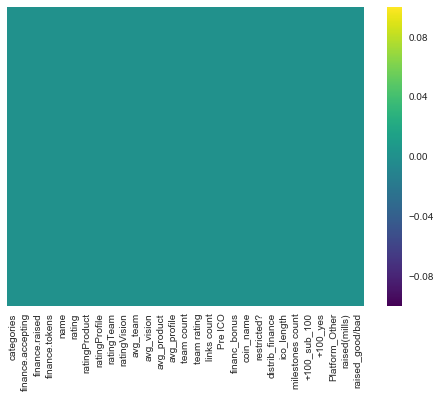

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [4]:
#just transform goo/bad to categorical

df['raised_good/bad'] = df['raised_good/bad'].astype('category').cat.codes
df_noz['raised_good/bad'] = df_noz['raised_good/bad'].astype('category').cat.codes

In [5]:
#logistic regression
# Drop the name of coin first
df = df.drop(['name','finance.raised'],axis=1)
df_noz = df_noz.drop(['name','finance.raised'],axis=1)

In [6]:
X = df.drop('raised_good/bad',axis=1)
y = df['raised_good/bad']

In [7]:
X_noz = df_noz.drop('raised_good/bad',axis=1)
y_noz = df_noz['raised_good/bad']

In [8]:
# 0s are below 5.5, 1s are above 5.5 and 2s are 0

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       136
          1       0.15      0.78      0.25       141
          2       0.71      0.25      0.37       715

avg / total       0.53      0.29      0.30       992

[[  0  95  41]
 [  0 110  31]
 [  2 536 177]]


In [9]:
#the 1s are over 5.5 mill 0 below

Xnoz_train,Xnoz_test,ynoz_train,ynoz_test = train_test_split(X_noz,y_noz,test_size=0.3,random_state=100)
logmodel_noz = LogisticRegression()
logmodel_noz.fit(Xnoz_train,ynoz_train)
pred_noz = logmodel_noz.predict(Xnoz_test)

print(classification_report(ynoz_test,pred_noz))
print(confusion_matrix(ynoz_test,pred_noz))

             precision    recall  f1-score   support

          0       1.00      0.05      0.10       133
          1       0.53      1.00      0.69       143

avg / total       0.76      0.54      0.41       276

[[  7 126]
 [  0 143]]


In [ ]:
##############################################
##############################################

# moving onto KNN


In [10]:
df_scaled = df.copy()
dfnoz_scaled = df_noz.copy()

In [11]:
scaler = StandardScaler()
df_scaled[['categories','finance.tokens','rating', 'ratingProduct', 'ratingProfile', 'ratingTeam','ratingVision', 'avg_team', 'avg_vision', 'avg_product', 'avg_profile','team count', 'team rating', 'links count', 'distrib_finance', 'ico_length','milestones count','raised(mills)']] = scaler.fit_transform(df_scaled[['categories','finance.tokens','rating', 'ratingProduct', 'ratingProfile', 'ratingTeam','ratingVision', 'avg_team', 'avg_vision', 'avg_product', 'avg_profile','team count', 'team rating', 'links count', 'distrib_finance', 'ico_length','milestones count','raised(mills)']])

Xknn = df_scaled.drop('raised_good/bad',axis=1)
yknn = df_scaled['raised_good/bad']



In [12]:
scaler_noz = StandardScaler()
dfnoz_scaled[['categories','finance.tokens','rating', 'ratingProduct', 'ratingProfile', 'ratingTeam','ratingVision', 'avg_team', 'avg_vision', 'avg_product', 'avg_profile','team count', 'team rating', 'links count', 'distrib_finance', 'ico_length','milestones count','raised(mills)']] = scaler_noz.fit_transform(dfnoz_scaled[['categories','finance.tokens','rating', 'ratingProduct', 'ratingProfile', 'ratingTeam','ratingVision', 'avg_team', 'avg_vision', 'avg_product', 'avg_profile','team count', 'team rating', 'links count', 'distrib_finance', 'ico_length','milestones count','raised(mills)']])

Xknnnoz = dfnoz_scaled.drop('raised_good/bad',axis=1)
yknnnoz = dfnoz_scaled['raised_good/bad']

In [13]:
Xknn_train,Xknn_test,yknn_train,yknn_test = train_test_split(Xknn,yknn,test_size=0.3,random_state=3)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xknn_train,yknn_train)
predknn = knn.predict(Xknn_test)


print(classification_report(yknn_test,predknn))
print(confusion_matrix(yknn_test,predknn))


             precision    recall  f1-score   support

          0       0.22      0.22      0.22       136
          1       0.71      0.64      0.67       141
          2       0.83      0.84      0.84       715

avg / total       0.73      0.73      0.73       992

[[ 30  14  92]
 [ 17  90  34]
 [ 90  22 603]]


In [14]:
Xknnnoz_train,Xknnnoz_test,yknnnoz_train,yknnnoz_test = train_test_split(Xknnnoz,yknnnoz,test_size=0.3,random_state=3)
knn_noz = KNeighborsClassifier(n_neighbors=1)
knn_noz.fit(Xknnnoz_train,yknnnoz_train)
predknn_noz = knn_noz.predict(Xknnnoz_test)


print(classification_report(yknnnoz_test,predknn_noz))
print(confusion_matrix(yknnnoz_test,predknn_noz))

             precision    recall  f1-score   support

          0       0.65      0.72      0.69       138
          1       0.69      0.62      0.65       138

avg / total       0.67      0.67      0.67       276

[[100  38]
 [ 53  85]]


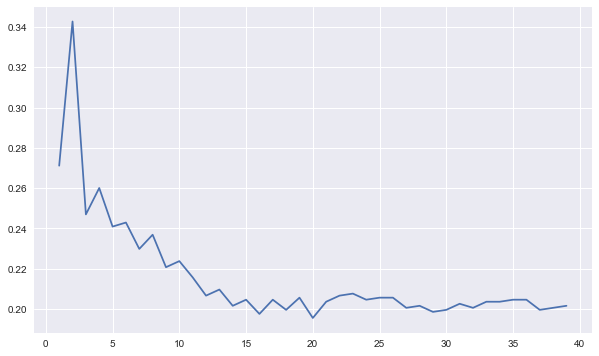

In [15]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xknn_train,yknn_train)
    predknn_i = knn.predict(Xknn_test)
    error_rate.append(np.mean(predknn_i != yknn_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

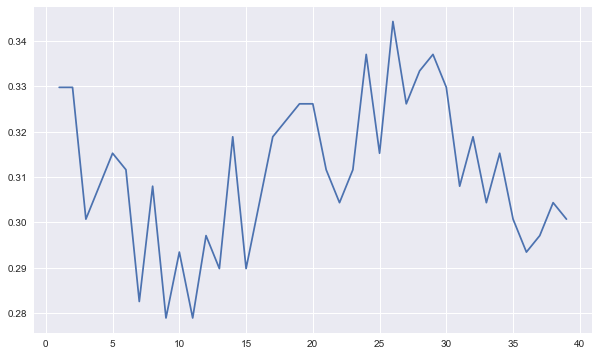

In [16]:
error_rate_noz = []

for i in range(1,40):
    knn_noz = KNeighborsClassifier(n_neighbors=i)
    knn_noz.fit(Xknnnoz_train,yknnnoz_train)
    predknn_noz_i = knn_noz.predict(Xknnnoz_test)
    error_rate_noz.append(np.mean(predknn_noz_i != yknnnoz_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_noz)

In [ ]:
######################################
######################################

# moving onto support vector machines

In [17]:
Xsvm = df_scaled.drop('raised_good/bad',axis=1)
ysvm = df_scaled['raised_good/bad']
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(Xsvm,ysvm,test_size=0.3,random_state=3)


model = SVC()
model.fit(X_train_svm,y_train_svm)
pred_svm = model.predict(X_test_svm)

print(confusion_matrix(y_test_svm,pred_svm))
print(classification_report(y_test_svm,pred_svm))

[[  1   1 134]
 [ 13 118  10]
 [  0   0 715]]
             precision    recall  f1-score   support

          0       0.07      0.01      0.01       136
          1       0.99      0.84      0.91       141
          2       0.83      1.00      0.91       715

avg / total       0.75      0.84      0.79       992



In [20]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train_svm,y_train_svm)
print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test_svm)

print(confusion_matrix(y_test_svm,grid_pred))
print(classification_report(y_test_svm,grid_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.722438 -   0.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.722438 -   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.722438 -   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.753567 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.761349 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.750973 -   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.735409 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.743191 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.740597 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........................ C=1000, gamma=1, score=0.726329 -   0.2s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.723735 -   0.2s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.714656 -   0.2s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.844358 -   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.822309 -   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.840467 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.919585 -   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   14.7s finished


{'C': 1000, 'gamma': 0.001}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[ 91   2  43]
 [  1 140   0]
 [  0   0 715]]
             precision    recall  f1-score   support

          0       0.99      0.67      0.80       136
          1       0.99      0.99      0.99       141
          2       0.94      1.00      0.97       715

avg / total       0.96      0.95      0.95       992



In [21]:
Xsvm_noz = dfnoz_scaled.drop('raised_good/bad',axis=1)
ysvm_noz = dfnoz_scaled['raised_good/bad']
Xnoz_train_svm,Xnoz_test_svm,ynoz_train_svm,ynoz_test_svm = train_test_split(Xsvm_noz,ysvm_noz,test_size=0.3,random_state=3)


model_noz = SVC()
model_noz.fit(Xnoz_train_svm,ynoz_train_svm)
prednoz_svm = model_noz.predict(Xnoz_test_svm)

print(confusion_matrix(ynoz_test_svm,prednoz_svm))
print(classification_report(ynoz_test_svm,prednoz_svm))

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
gridnoz = GridSearchCV(SVC(),param_grid,verbose=3)
gridnoz.fit(Xnoz_train_svm,ynoz_train_svm)
print(grid.best_params_)
print(grid.best_estimator_)
gridnoz_pred = gridnoz.predict(Xnoz_test_svm)

print(confusion_matrix(ynoz_test_svm,gridnoz_pred))
print(classification_report(ynoz_test_svm,gridnoz_pred))

[[130   8]
 [ 33 105]]
             precision    recall  f1-score   support

          0       0.80      0.94      0.86       138
          1       0.93      0.76      0.84       138

avg / total       0.86      0.85      0.85       276

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.544186 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.500000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.679070 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.658879 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.500000 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.623256 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.677570 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.621495 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.851163 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.789720 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.808411 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
